# Projeto 2 - NLP

-----

**Nome:** Gabriel d'Agosto Pache de Faria

**Turma:** 781

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 23/02/2022;


- Aula de monitoria: 09/03/2022;


- Data de entrega: 14/03/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Resolução

## Disclaimer


Gostaria também de explicar inicialmente que o processo representado neste Notebook não representa o desenvolvimento do trabalho em ordem cronológica. Existirão momentos em que um processo foi feito inicialmente com uma opção (como por exemplo, o pré-processamento de textos), e então, conforme a evolução do projeto, foram adicionadas mais opções de pré-processamento. Para facilitar o entendimento e a execução do projeto, as partes do projeto foram agrupadas de forma a seguir a ordem de processamento que o problema exige.

<hr>

## Análise de Consistência dos Dados

In [144]:
# Run this cell to start

# lib imports
import pandas as pd

# import dataset
df = pd.read_csv('./datasets/Train3Classes.csv')
df.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)
5,1046774830857695232,@ppolkiss Parabéns moço :D,Mon Oct 01 14:52:22 +0000 2018,1,:)
6,1032054856712945664,Trago verdades #fato https://t.co/DsbkrJgFVj,Wed Aug 22 00:00:27 +0000 2018,2,#fato
7,1046740081090981889,"A coleção aumentou, mas o espaço do quaro ""dim...",Mon Oct 01 12:34:17 +0000 2018,1,:)
8,1046768079349403648,@abreujaviera Amigaa :(,Mon Oct 01 14:25:32 +0000 2018,0,:(
9,1046760775182888961,fiquei exatos 45 minutos tentando conectar meu...,Mon Oct 01 13:56:31 +0000 2018,1,:)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
df.describe()

,id,sentiment
count,9.500000e+04,95000.000000
mean,1.045740e+18,0.999263
std,4.259084e+15,0.816427
min,1.027374e+18,0.000000
25%,1.045370e+18,0.000000
50%,1.046827e+18,1.000000
75%,1.049106e+18,2.000000
max,1.053355e+18,2.000000


### Dados Missing

In [10]:
(df.isna()).sum() * 100 / len(df) # Missing percentages

id            0.0
tweet_text    0.0
tweet_date    0.0
sentiment     0.0
query_used    0.0
dtype: float64

Vemos que não há dados faltantes, em nenhuma coluna. Vamos checar tambem se há tweets em branco

In [116]:
for i in range(20):
    if len(df[df['tweet_text'].str.len() <= i]) > 0:
        print('Smallest tweet length:', i)
        break

Smallest tweet length: 7


Vemos então que não existe nenhum tweet com menos de 7 caracteres, o que conclui que não temos tweets em branco

### Dados Duplicados

Aqui, primeiro vamos verificar se existem duas linhas cujo id unico se repete. Como o id do tweet é unico (e podemos verificar um tweet a partir do link twitter.com/anyuser/status/[ID_DO_TWEET]), não é possivel que existam dois tweets com o mesmo id, portanto são dados duplicados

In [65]:
duplicatedIds = df['id'].duplicated(keep=False)
duplicatedIds.value_counts()

False    94974
True        26
Name: id, dtype: int64

In [67]:
# Checamos agora se, dentre os dados duplicados, os sentimentos são iguais ou diferentes
df[duplicatedIds][['id','sentiment']].duplicated(keep=False).value_counts()

True     24
False     2
dtype: int64

In [69]:
# Checando quais são os dados duplicados que tem sentimentos diferentes
df[duplicatedIds][~df[duplicatedIds][['id', 'sentiment']].duplicated(keep=False)]

,id,tweet_text,tweet_date,sentiment,query_used
34464,1050747512179576834,"era para ser somente algo normal, sem perceber...",Fri Oct 12 13:58:23 +0000 2018,2,#trabalho
48967,1050747512179576834,"era para ser somente algo normal, sem perceber...",Fri Oct 12 13:58:23 +0000 2018,1,:)


Vemos que o tweet 1050747512179576834 foi classificado como neutro e positivo ao mesmo tempo. O que me leva a crer que o query_used foi utilizado para classificar os tweets inicialmente.

Como não consigo determinar qual sentimento está correto, terei de remover esse tweet da base.

Quanto aos outros, ja que tenho um sentimento ja determinado, posso utilizar um keep=First e manter os dados duplicados

In [117]:
# Removendo o tweet problematico
df.drop([34464, 48967], inplace=True)

# Removendo duplicatas com keep=First
df = df[~df['id'].duplicated(keep='first')]

<hr>

Agora, vamos avaliar se existem tweet_texts duplicados, seguindo o mesmo processo dos ids.

In [101]:
duplicatedTexts = df['tweet_text'].duplicated(keep=False)
duplicatedTexts.value_counts()


False    93712
True      1274
Name: tweet_text, dtype: int64

In [103]:
# Checamos agora se, dentre os dados duplicados, os sentimentos são iguais ou diferentes
df[duplicatedTexts][['tweet_text', 'sentiment']
                    ].duplicated(keep=False).value_counts()


True    1274
dtype: int64

Vemos então que não existem tweet_texts com sentimentos misturados. Portanto podemos dropar com o keep=First sem problema

In [118]:
df = df[~df['tweet_text'].duplicated(keep='first')]

### Converter tipos
Vamos reduzir o tamanho do dataframe convertendo os tipos das colunas

In [138]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])

In [141]:
col_types = {
    'tweet_text': 'string',
    'sentiment': 'ubyte',
    'query_used': 'string',
}
df = df.astype(col_types)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94183 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          94183 non-null  int64              
 1   tweet_text  94183 non-null  string             
 2   tweet_date  94183 non-null  datetime64[ns, UTC]
 3   sentiment   94183 non-null  uint8              
 4   query_used  94183 non-null  string             
dtypes: datetime64[ns, UTC](1), int64(1), string(2), uint8(1)
memory usage: 5.7 MB


Por fim, vamos salvar nosso df alterado em um arquivo pickle para podermos recarregar em outras etapas

In [142]:
df.to_pickle('./datasets/fixed_training_data.pkl')

<hr>

## Análise exploratória

In [93]:
# Run this cell to start

# lib imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from itertools import chain

from unidecode import unidecode

import copy

plt.style.use('ggplot')
color_palette = sns.color_palette("muted", 10)


def cria_fig_ax(figsize=(16, 9), **kwargs):
    """
    Initialize fig and axs with some basic default values
    """
    fig, axs = plt.subplots(figsize=figsize, **kwargs)
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    return fig, axs


def formata_grafico(grf, titulo='', legenda=[], xlabel='', ylabel='', titulo_legenda='', xticks=[]):
    """
    Given a matplotlib chart, allows for some customization while following some global formatting rules
    """
    if (titulo != ''):
        grf.set_title(titulo, loc='left', fontsize=20)

    if len(legenda) > 0:
        grf.legend(legenda, title=titulo_legenda,
                   bbox_to_anchor=(1.02, 1), loc='upper left')
    # else:
    #     grf.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    if (xlabel != ''):
        grf.set_xlabel(xlabel)
    if (ylabel != ''):
        grf.set_ylabel(ylabel)

    if (len(xticks) > 0):
        grf.set_xticklabels(xticks)

    grf.spines['top'].set_visible(False)
    grf.spines['right'].set_visible(False)

    return grf


In [ ]:
# df import
df = pd.read_pickle('./datasets/fixed_training_data.pkl')

### Balanceamento

Vamos checar o balanceamento de classes no dataset de treinamento utilizando o value_counts

In [11]:
df['sentiment'].value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}%')

2    33.40%
0    33.39%
1    33.21%
Name: sentiment, dtype: object

Podemos observar que os dados estão quase perfeitamente balanceados.

### Mini pré-processamento

Para processar os dados de frequencia de palavras, numero de palavras, precisamos fazer um mini-pré-processamento

In [22]:
def mini_preprocessing(rows):

    def preprocess_row(string):
        string = string.lower() # Tudo lowercase
        string = unidecode(string) # Remove acentuação
        return [word for word in string.split(' ') if word] # Divide em palavras

    rows = rows.apply(preprocess_row)
    word_freq = Counter(chain.from_iterable(rows)) # Faz um dicionario de frequencias
    
    return rows.apply(lambda row: [word for word in row if word_freq[word] > 1]) # Remove palavras unicas

df['words'] = mini_preprocessing(df['tweet_text'])



In [26]:
df.head(10)

,id,tweet_text,tweet_date,sentiment,query_used,words
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,2018-10-09 18:00:01+00:00,2,folha,"[rio, elege, maior, bancada, policial, de, sua..."
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,2018-09-30 04:11:28+00:00,0,:(,"[fiquei, tao, triste, quando, eu, vi, o, preco..."
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",2018-09-17 17:44:06+00:00,2,exame,"[para, theresa, seu, plano, para, o, brexit, e..."
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,2018-10-02 01:37:06+00:00,0,:(,"[caralho, eu, quero, proteger, a, em, um, pote..."
4,1047326854229778432,@SiCaetano_ viva o caos :),2018-10-03 03:25:55+00:00,1,:),"[viva, o, caos, :)]"
5,1046774830857695232,@ppolkiss Parabéns moço :D,2018-10-01 14:52:22+00:00,1,:),"[@ppolkiss, parabens, moco, :d]"
6,1032054856712945664,Trago verdades #fato https://t.co/DsbkrJgFVj,2018-08-22 00:00:27+00:00,2,#fato,"[trago, verdades, #fato]"
7,1046740081090981889,"A coleção aumentou, mas o espaço do quaro ""dim...",2018-10-01 12:34:17+00:00,1,:),"[a, colecao, mas, o, espaco, do, novas, fotos,..."
8,1046768079349403648,@abreujaviera Amigaa :(,2018-10-01 14:25:32+00:00,0,:(,[:(]
9,1046760775182888961,fiquei exatos 45 minutos tentando conectar meu...,2018-10-01 13:56:31+00:00,1,:),"[fiquei, exatos, 45, minutos, tentando, conect..."


Vamos observar o numero de palavras em cada um dos sentiments

<ipython-input-45-089c4c1b0eda>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


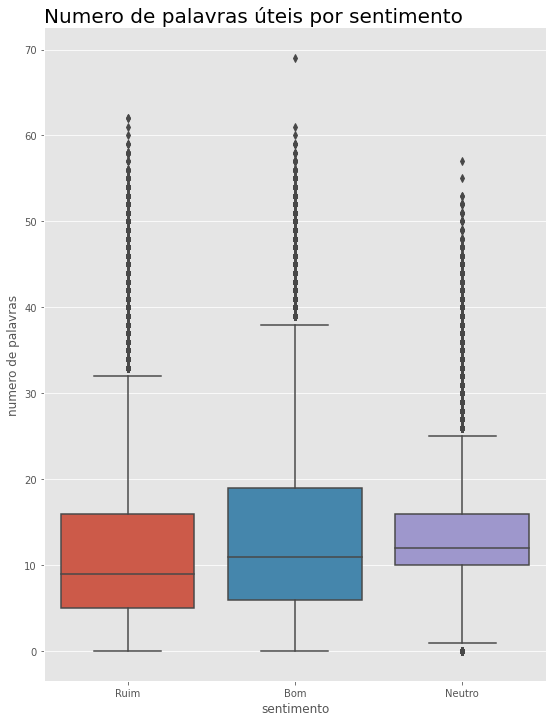

In [45]:
df['word_count'] = df['words'].apply(lambda x: len(x))

fig, axs = cria_fig_ax(figsize=(9, 12))
sns.boxplot(data=df, y='word_count', x='sentiment', ax=axs)
axs = formata_grafico(axs, 'Numero de palavras úteis por sentimento', 
                      ylabel='numero de palavras', 
                      xlabel='sentimento',
                      xticks=['Ruim','Bom','Neutro'])
fig.show()


Não é possivel chegar a nenhuma conclusão. Todos os sentimentos se encontram num range muito parecido.

Vamos ver agora as palavras mais comuns por sentimento

In [46]:
for i in range(2):
    print(i)

0
1


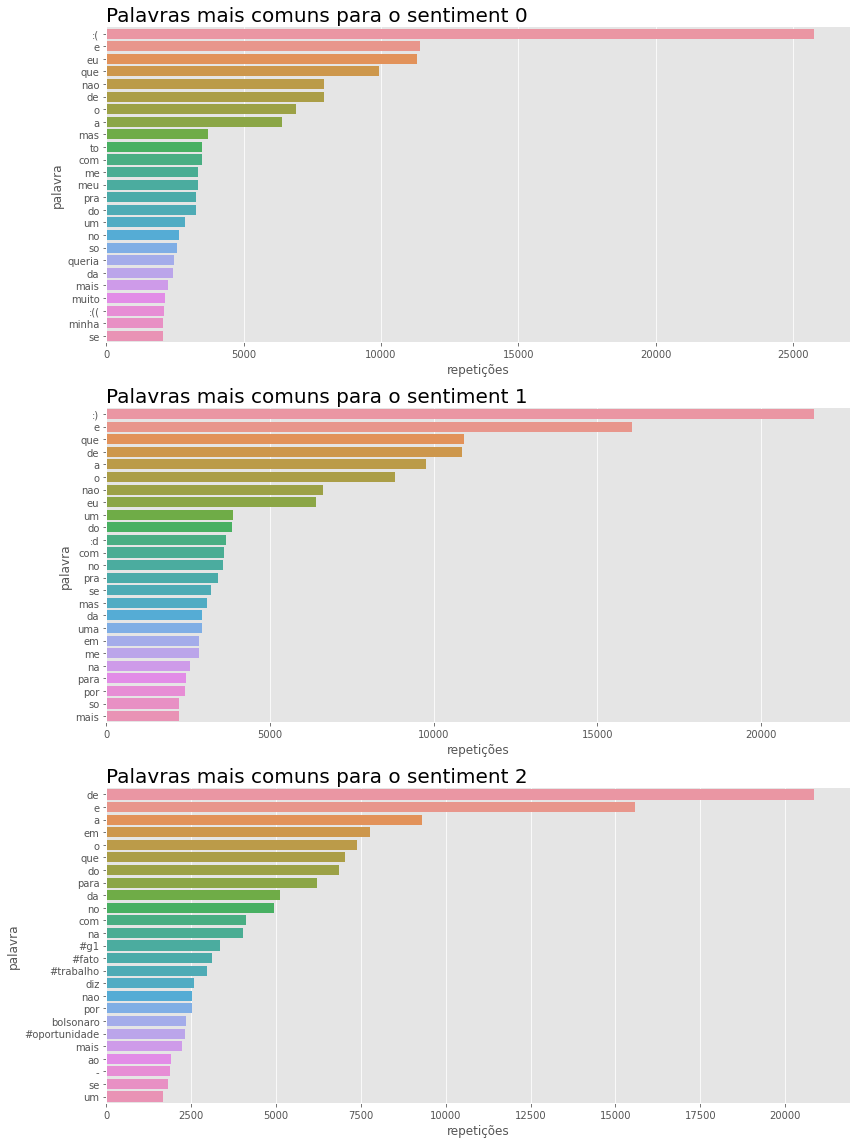

In [69]:
fig, axs = cria_fig_ax(nrows=3,figsize=(12, 16))

for n in range(3):
    word_freq = Counter(chain.from_iterable(df[df['sentiment'] == n]['words']))

    df_freq = pd.DataFrame(word_freq.most_common(25), columns=['word', 'count'])
    sns.barplot(data=df_freq,y='word',x='count',ax=axs[n])

    axs[n] = formata_grafico(axs[n], f'Palavras mais comuns para o sentiment {n}',
                             xlabel='repetições', ylabel='palavra')
        
fig.tight_layout()


Vamos agora separar a frequencia relativa das palavras em relação aos outro sentimentos. Ou seja. Para cada palavra, vamos ver em qual porcentagem ela aparece no sentimento em questão, e subtrair da média dos outros dois sentimentos, para ver o aumento de frequencia nos tweets daquele sentimento especifico

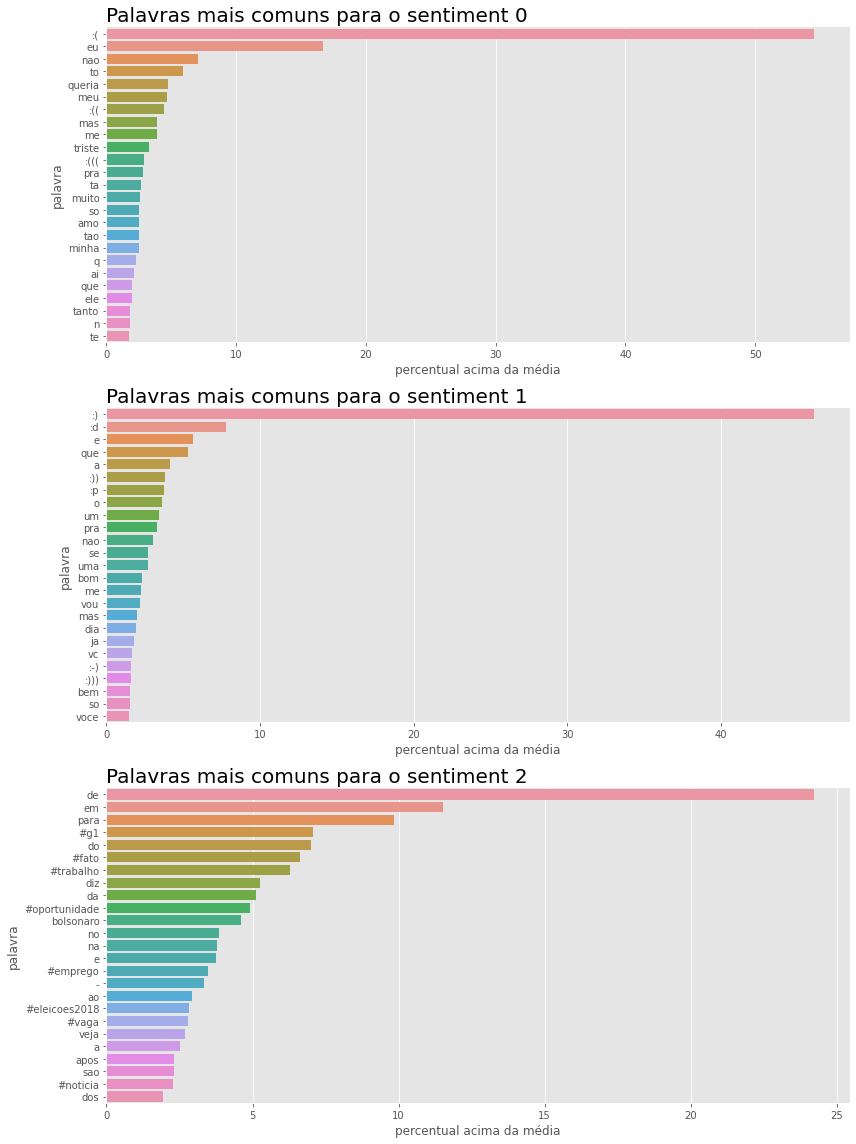

In [115]:
fig, axs = cria_fig_ax(nrows=3, figsize=(12, 16))

word_freq = []

# Calcula a frequencia de palavras
for n in range(3):
    sentiment_df = df[df['sentiment'] == n]
    size = len(sentiment_df)
    wf = Counter(chain.from_iterable(sentiment_df['words']))

    for w in wf:
        wf[w] *= 100/size

    word_freq.append(wf)

# Tira a media da frequencia de palavras
mean_word_freq = Counter()
for wf in word_freq:
    mean_word_freq.update(wf)

for word in mean_word_freq:
    mean_word_freq[word] /= len(word_freq)


# Faz a diferença entre o word_freq e a média
for n in range(3):
    new_wf = word_freq[n] - mean_word_freq

    df_freq = pd.DataFrame(new_wf.most_common(25),
                           columns=['word', 'count'])
    sns.barplot(data=df_freq, y='word', x='count', ax=axs[n])

    axs[n] = formata_grafico(axs[n], f'Palavras mais comuns para o sentiment {n}',
                             xlabel='percentual acima da média', ylabel='palavra')

fig.tight_layout()


Vemos aqui que temos palavras distintas para cada sentimento.
1. O sentimento 0 tem os emoticons `:(` e `:((`, e as palavra `queria`, `eu`, `não` e `to` e `triste`
2. O sentimento 1 tem os emoticosns `:)`, `:))` e `:d`, além de maior uso de palavras de apenas uma letra
3. O sentimento 2 tem algumas hashtags, e as palavras `de`, `em`, `para` e até `bolsonaro`

Vamos checar na coluna query_used para ver se as palavras tem alguma relação

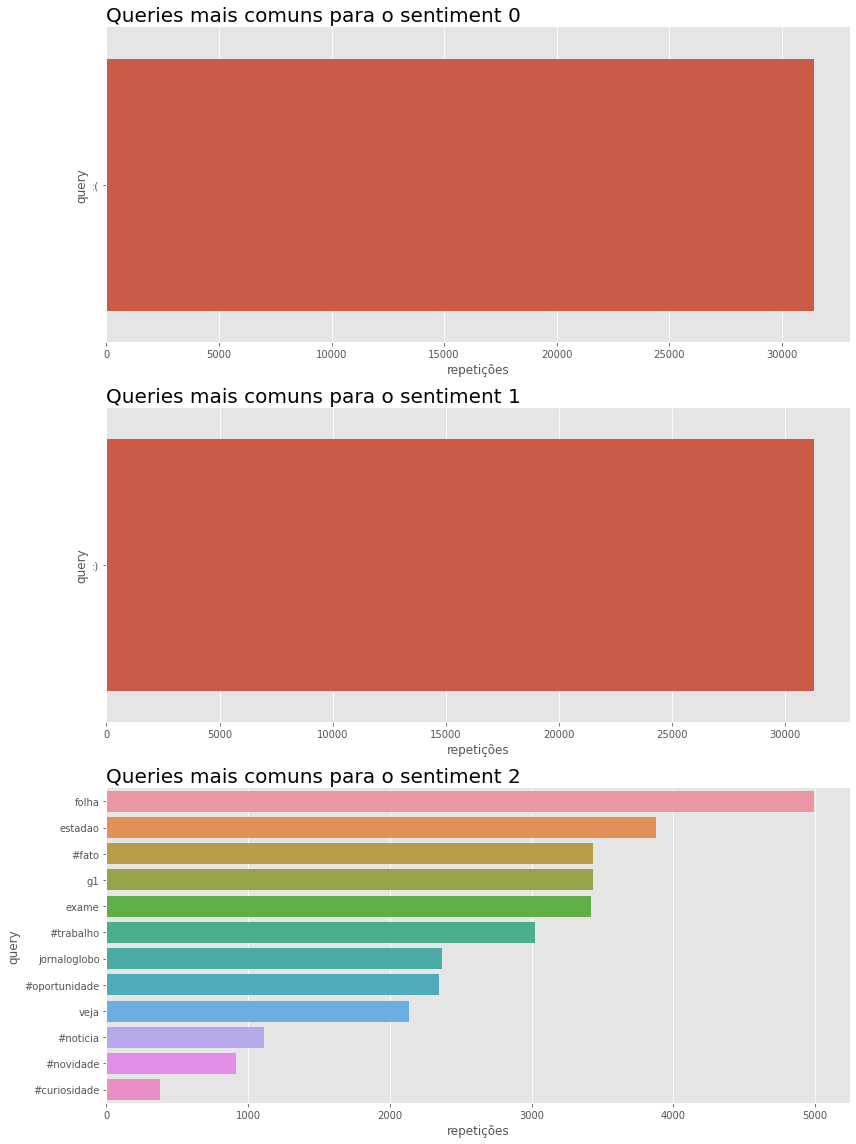

In [83]:
fig, axs = cria_fig_ax(nrows=3,figsize=(12, 16))

for n in range(3):
    query_freq = df[df['sentiment'] == n]['query_used'].value_counts()

    df_freq = pd.DataFrame(query_freq).reset_index()
    sns.barplot(data=df_freq,y='index',x='query_used',ax=axs[n])

    axs[n] = formata_grafico(axs[n], f'Queries mais comuns para o sentiment {n}',
                             xlabel='repetições', ylabel='query')
        
fig.tight_layout()


Vemos então que varias das palavras mais comuns identificadas como distintas são as mesmas que aparecem nas queries. Isso pode representar um dataleak caso o objetivo do modelo seja enquadrar outras queries tambem. Porém, ao analisar os dados de submissão, vemos que as queries_used nos dados de submissão são as mesmas queries dos dados de treino. Isso pode significar que o objetivo do modelo é detectar apenas essas queries, e portanto essas palavras serão uteis para chegar a um resultado satisfatório

<hr>

## Pré-processamento e transformações

In [19]:
# Run this cell to start

# lib imports
import pandas as pd
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re

from collections import Counter
from itertools import chain

# df import
df = pd.read_pickle('./datasets/fixed_training_data.pkl')


In [17]:
def preprocessing_1(rows):
    '''
        [pp1]
        - Remover acentuação
        - Tokenizar
        - Remover stopwords
        - Lemmatizar (spacy)
    '''
    my_stopwords = stopwords.words('portuguese')
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower() # Lowercase
        string = unidecode(string) # Remove acentuação
        words = word_tokenize(string) # Tokenização
        filtered_words = [w for w in words if w not in my_stopwords] # Remove stopwords
        lemma_words = [t.lemma_ for t in nlp(' '.join(filtered_words))]  # lemma com spacy
        return lemma_words

    return rows.apply(lambda x: ' '.join(pp_string(x)))
    

def preprocessing_2(rows):
    '''
        [pp2]
        - Remover acentuação
        - Lemmatizar (spacy)
    '''
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower() # Lowercase
        string = unidecode(string) # Remove acentuação
        lemma_words = [t.lemma_ for t in nlp(string)]  # lemma com spacy
        return lemma_words

    return rows.apply(lambda x: ' '.join(pp_string(x)))

def preprocessing_3(rows):
    '''
        [pp3]
        - Remover acentuação
        - Lemmatizar (spacy)
        - Remover caracteres especiais e numeros
    '''
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower()  # Lowercase
        string = unidecode(string)  # Remove acentuação
        string = re.sub(r'[^a-z ]', '',string) # Remove caracteres especiais e numeros
        lemma_words = [t.lemma_ for t in nlp(string)]  # lemma com spacy
        return lemma_words

    return rows.apply(lambda x: ' '.join(pp_string(x)))


def preprocessing_4(rows):
    '''
        [pp4]
        - Converter links em https
        - Remover acentuação
        - Remover caracteres especiais e numeros
        - Lemmatizar (spacy)
        - Remover palavras unicas
    '''
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower()  # Lowercase
        string = re.sub(r'https*\S+','https',string) # Converte links
        string = unidecode(string)  # Remove acentuação
        string = re.sub(r'[^a-z ]','',string) # Remove caracteres especiais e numeros
        lemma_words = [t.lemma_ for t in nlp(string)]  # lemma com spacy
        return lemma_words

    rows = rows.apply(pp_string)
    word_freq = Counter(chain.from_iterable(rows))

    return rows.apply(lambda row: ' '.join([word for word in row if word_freq[word] > 1]))

def preprocessing_5(rows):
    '''
        [pp5]
        - Converter links em https
        - Remover acentuação
        - Lemmatizar (spacy)
        - Remover palavras unicas
    '''
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower()  # Lowercase
        string = re.sub(r'https*\S+','https',string) # Converte links
        string = unidecode(string)  # Remove acentuação
        lemma_words = [t.lemma_ for t in nlp(string)]  # lemma com spacy
        return lemma_words

    rows = rows.apply(pp_string)
    word_freq = Counter(chain.from_iterable(rows))

    return rows.apply(lambda row: ' '.join([word for word in row if word_freq[word] > 1]))



In [111]:
df['pp_1'] = preprocessing_1(df['tweet_text'])
df['pp_1'].to_pickle('./datasets/preprocessing_1.pkl')

In [112]:
df['pp_2'] = preprocessing_2(df['tweet_text'])
df['pp_2'].to_pickle('./datasets/preprocessing_2.pkl')

In [113]:
df['pp_3'] = preprocessing_3(df['tweet_text'])
df['pp_3'].to_pickle('./datasets/preprocessing_3.pkl')

In [114]:
df['pp_4'] = preprocessing_4(df['tweet_text'])
df['pp_4'].to_pickle('./datasets/preprocessing_4.pkl')

In [20]:
df['pp_5'] = preprocessing_5(df['tweet_text'])
df['pp_5'].to_pickle('./datasets/preprocessing_5.pkl')

<hr>

## Treinamento do Modelo

Para treinar o modelo, decidi seguir a seguinte abordagem.

Separei o que eu iria aplicar, sequencialmente, em 3 etapas

**1: Pré-Processamento**
Declarei na variavel ppNumbers todos os pré-processamentos feitos anteriormente, com seus ids de 1 a 5.

**2: Modelos de Pré-Processamento**
Aqui, converto as strings finais em features, que poderão ser utilizadas pelos meus modelos de Machine Learning. Aqui se encontram o CountVectorizer, TF-IDF, Word2Vec e Doc2Vec. Os modelos estão descritos na variável ppModels

**3. Modelos de Machine Learning**
Finalmente, rodo 6 modelos de machine learning para cada sequencia anterior. Os modelos escolhidos se encontram na variável models.


Ao fazer a combinação extensa entre os 3 passos, encontrarei a melhor Pipeline para processar os dados dos tweets, e seguirei otimizando ela

In [81]:
# Run this cell to start

# lib imports
import numpy as np
import pandas as pd
import pickle

from functools import partial

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.models import doc2vec

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# global consts
RANDOM_STATE = 42

N_JOBS = 6

y = pd.read_pickle('./datasets/fixed_training_data.pkl')['sentiment'].astype('float32')


In [82]:
def apply_preprocessing_model(X_train, X_test, ppModel):
    '''
        Given X_train, X_test and a preprocessing Model (TF-IDF, CountVectorize),
        fit and transform the data, and then return it
    '''
    X_train_model = ppModel.fit_transform(X_train)
    X_test_model = ppModel.transform(X_test)
    return X_train_model, X_test_model


def test_models(X_train, X_test, y_train, y_test, models, colModelName, colModel):
    ''' 
        Given training and test data, and a ML Model,
        fit and transform data, then return accuracy, precision, recall and F1 Score
    '''

    response = {}
    for mdl in models:

        model = mdl[colModel]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        results = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        response[mdl.get(colModelName)] = results
    return response
        


def split_fit_test_report(X, y, applyPpModel, test_models):
    '''
        Do everything you need to test pipelines.
        1. Split train and test
        2. Send to ppModel
        3. Test all ML models
        4. Return results
    '''
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=RANDOM_STATE,
                                                        stratify=y)

    X_train, X_test = applyPpModel(X_train,X_test)
    
    return test_models(X_train.astype('float32'),
                       X_test.astype('float32'), 
                       y_train, 
                       y_test)


def return_df_results(pipeline_response, ppNumber, ppModel):
    '''
        Given a pipeline_response,
        returns result dataframe formatted rows, 
        so one can compare multiple results and find the optimal model
    '''

    df_results = pd.DataFrame(
        columns=['model', 'ppNumber', 'ppModel', 'accuracy', 'precision', 'recall', 'f1'])
    for modelName in pipeline_response:
        model = pipeline_response[modelName]
        results = {
            'model': modelName,
            'ppNumber': ppNumber,
            'ppModel': ppModel,
            'accuracy': model['accuracy'],
            'precision': model['precision'],
            'recall': model['recall'],
            'f1': model['f1'],
        }

        df_results = df_results.append(results, ignore_index=True)

    return df_results


In [83]:
models = [
    {
        'modelName': 'Logistic Regression',
        'estimator': LogisticRegression(random_state=RANDOM_STATE,
                                        solver='lbfgs',
                                        n_jobs=N_JOBS)
    },
    {
        'modelName': 'Decision Tree',
        'estimator': DecisionTreeClassifier(random_state=RANDOM_STATE)},
    {
        'modelName': 'Random Forest',
        'estimator': RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)},
    {
        'modelName': 'AdaBoost',
        'estimator': AdaBoostClassifier(random_state=RANDOM_STATE)},
    {
        'modelName': 'LightGBM',
        'estimator': LGBMClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)},
    {
        'modelName': 'XGBoost',
        'estimator': XGBClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)},
]

ppNumbers = [
    {
        'id': 1,
        'filePath': './datasets/preprocessing_1.pkl'
    },
    {
        'id': 2,
        'filePath': './datasets/preprocessing_2.pkl'
    },
    {
        'id': 3,
        'filePath': './datasets/preprocessing_3.pkl'
    },
    {
        'id': 4,
        'filePath': './datasets/preprocessing_4.pkl'
    },
    {
        'id': 5,
        'filePath': './datasets/preprocessing_5.pkl'
    },
]

ppModels = {
    'CountVectorize': {
        'model': CountVectorizer(),
        'fileName': 'cv'
    },
    'TF-IDF': {
        'model': TfidfVectorizer(use_idf=True),
        'fileName': 'tfidf'
    },
    'Word2Vec-mean': {
        'fileName': 'w2v-m'
    },
    'Doc2Vec': {
        'fileName': 'd2v'
    },
}   


In [4]:
test_preprocessing = partial(test_models,
                             models=models,
                             colModelName='modelName',
                             colModel='estimator')

df_results = pd.DataFrame(
    columns=['model', 'ppNumber', 'ppModel', 'accuracy', 'precision', 'recall', 'f1'])


### Count Vectorize

In [14]:
ppModelName = 'CountVectorize'
ppModel = ppModels[ppModelName]

for n in ppNumbers:

    response = split_fit_test_report(
        X=pd.read_pickle(n['filePath']),
        y=y,
        applyPpModel=partial(apply_preprocessing_model, ppModel=ppModel['model']),
        test_models=test_preprocessing,
    )

    # Save to Pickle
    file_name = f'results/pr_pp{n["id"]}_{ppModel["fileName"]}.pkl'
    pickle.dump(response, open(file_name, 'wb'))

    # Add to df_results
    df_results = df_results.append(
        return_df_results(response, n['id'], ppModelName))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8948
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3295
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.222761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9154
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3333
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.203389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8852
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3236
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.208930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8849
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3232
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### TF-IDF

In [15]:
ppModelName = 'TF-IDF'
ppModel = ppModels[ppModelName]

for n in ppNumbers:

    response = split_fit_test_report(
        X=pd.read_pickle(n['filePath']),
        y=y,
        applyPpModel=partial(apply_preprocessing_model, ppModel=ppModel['model']),
        test_models=test_preprocessing
    )

    # Save to Pickle
    file_name = f'results/pr_pp{n["id"]}_{ppModel["fileName"]}.pkl'
    pickle.dump(response, open(file_name, 'wb'))

    # Add to df_results
    df_results = df_results.append(
        return_df_results(response, n['id'], ppModelName))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.199595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123576
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3295
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.223029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133638
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3333
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.236882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129261
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3236
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.222315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129346
[LightGBM] [Info] Number of data points in the train set: 65928, number of used features: 3232
[LightGBM] [Info] Start training from score -1.096885
[LightGBM] [Info] Start training from score -1.102259
[LightGBM] [Info] Start training from score -1.096703


C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Word2Vec

Pela velocidade do Word2Vec, acabei testando apenas a Regressão Logística nele, pois era o model que estava com o melhor resultado.

In [5]:
test_preprocessing_log_res = partial(test_models,
                             models=[models[0]],
                             colModelName='modelName',
                             colModel='estimator')

df_results = pd.DataFrame(
    columns=['model', 'ppNumber', 'ppModel', 'accuracy', 'precision', 'recall', 'f1'])


In [39]:
ppModelName = 'Word2Vec-mean'
ppModel = ppModels[ppModelName]

def applyW2vMean(X_train, X_test):
    def w2vMean(X,model):
        X_w2v = []
        for phrase in X:
            vecs = []
            for word in phrase:
                if word in model.wv.index_to_key:
                    vecs.append(model.wv.get_vector(word))
            if vecs:
                X_w2v.append(np.sum(vecs, axis=0) / len(vecs))

            else:
                X_w2v.append(np.zeros(model.vector_size))

        return X_w2v

    model = Word2Vec(
        sentences=X_train, vector_size=500, min_count=5, workers=2
    )

    X_train_w2v = np.array(w2vMean(X_train, model))
    X_test_w2v = np.array(w2vMean(X_test, model))

    return X_train_w2v, X_test_w2v




for n in ppNumbers:

    response = split_fit_test_report(
        X=pd.read_pickle(n['filePath']),
        y=y,
        applyPpModel=applyW2vMean,
        test_models=test_preprocessing_log_res
    )

    # Save to Pickle
    file_name = f'results/pr_pp{n["id"]}_{ppModel["fileName"]}.pkl'
    pickle.dump(response, open(file_name, 'wb'))

    # Add to df_results
    df_results = df_results.append(
        return_df_results(response, n['id'], ppModelName))


### Doc2Vec

Pela velocidade do Word2Vec, acabei testando apenas a Regressão Logística nele, pois era o model que estava com o melhor resultado.

In [6]:
def read_corpus(list_sentences, tokens_only=False):
  if tokens_only:
    return list_sentences

  else:
    lista = []
    for i, line in enumerate(list_sentences):
      lista.append(doc2vec.TaggedDocument(line, [i]))
    return lista


In [33]:
ppModelName = 'Doc2Vec'
ppModel = ppModels[ppModelName]

def applyDoc2Vec(X_train,X_test):
    X_train_list = X_train.str.split(' ')
    X_test_list = X_test.str.split(' ')
    train_corpus = read_corpus(X_train_list)
    model = doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=20)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count,
                epochs=model.epochs)

    X_train_d2v = np.array(list(map(model.infer_vector, X_train_list)))
    X_test_d2v = np.array(list(map(model.infer_vector, X_test_list)))
    return X_train_d2v, X_test_d2v


for n in ppNumbers:

    response = split_fit_test_report(
        X=pd.read_pickle(n['filePath']),
        y=y,
        applyPpModel=applyDoc2Vec,
        test_models=test_preprocessing_log_res
    )

    # Save to Pickle
    file_name = f'results/pr_pp{n["id"]}_{ppModel["fileName"]}.pkl'
    pickle.dump(response, open(file_name, 'wb'))

    # Add to df_results
    df_results = df_results.append(
        return_df_results(response, n['id'], ppModelName))


### Resultados

In [85]:
df_results = pd.DataFrame(
    columns=['model', 'ppNumber', 'ppModel', 'accuracy', 'precision', 'recall', 'f1'])

for ppModel in ppModels:
    for n in ppNumbers:

        file_name = f'results/pr_pp{n["id"]}_{ppModels[ppModel]["fileName"]}.pkl'
        response = pickle.load(open(file_name, 'rb'))
        df_results = df_results.append(return_df_results(response, n['id'], ppModel))
        
df_results.sort_values(by=['f1'], ascending=False).head(20)

,model,ppNumber,ppModel,accuracy,precision,recall,f1
0,Logistic Regression,1,Word2Vec-mean,0.980711,0.980785,0.980711,0.980718
0,Logistic Regression,2,Word2Vec-mean,0.979827,0.979881,0.979827,0.979835
0,Logistic Regression,5,Word2Vec-mean,0.979154,0.979197,0.979154,0.979171
0,Logistic Regression,2,Doc2Vec,0.901646,0.901946,0.901646,0.901734
0,Logistic Regression,5,Doc2Vec,0.900867,0.901040,0.900867,0.900925
0,Logistic Regression,1,Doc2Vec,0.864343,0.864275,0.864343,0.864239
0,Logistic Regression,2,CountVectorize,0.816634,0.815967,0.816634,0.815893
0,Logistic Regression,5,CountVectorize,0.816103,0.815582,0.816103,0.815766
0,Logistic Regression,5,TF-IDF,0.816740,0.814700,0.816740,0.815597
0,Logistic Regression,4,CountVectorize,0.814935,0.814526,0.814935,0.814523


Vemos nos resultados descritos acima que os modelos de Regressão Logística com o Word2Vec-mean foram os melhores. Portanto, selecionei para otimização o modelo com o pré-processamento 1, já que ele apresentou o melhor F1 Score

<hr>

## Otimização de Modelo

Para a otimização, utilizarei o Optuna, com o modelo de Regressão Logística Word2Vec-mean, usando o preprocessamento nº1.
Tentei otimizar alguns parâmetros diferentes, mas acabei caindo em problemas, pois existem parâmetros que ficam indisponíveis dado que outros parâmetros são selecionados. Portanto, o unico parâmetro que consegui otimizar realmente foi o C.

Para a otimização, decidi utilizar o f1score como medida para otimizar o estudo do Optuna.

In [32]:
import pandas as pd
import numpy as np
import pickle
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from functools import partial
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_slice

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

N_JOBS = 6  # Change here depending on CPU threads
RANDOM_STATE = 42


In [4]:
X = pd.read_pickle('./datasets/preprocessing_1.pkl')

y = pd.read_pickle('./datasets/fixed_training_data.pkl')['sentiment'].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)


In [7]:
model = LogisticRegression(random_state=RANDOM_STATE,
                                        solver='lbfgs',
                                        n_jobs=N_JOBS)

In [8]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': 6,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
def applyW2vMean(X_train, X_test):
    def w2vMean(X, model):
        X_w2v = []
        for phrase in X:
            vecs = []
            for word in phrase:
                if word in model.wv.index_to_key:
                    vecs.append(model.wv.get_vector(word))
            if vecs:
                X_w2v.append(np.sum(vecs, axis=0) / len(vecs))

            else:
                X_w2v.append(np.zeros(model.vector_size))

        return X_w2v

    model = Word2Vec(
        sentences=X_train, vector_size=500, min_count=5, workers=6
    )

    X_train_w2v = np.array(w2vMean(X_train, model))
    X_test_w2v = np.array(w2vMean(X_test, model))

    return X_train_w2v, X_test_w2v

def objective(trial, X, y):

    logreg_c = trial.suggest_float('logreg_c', 1e-4, 1e4, log=True)


    model = LogisticRegression(C=logreg_c, solver='lbfgs', n_jobs=N_JOBS)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE, )
    kf_scores = []

    for idx, (train_index, val_index) in enumerate(kf.split(X, y)):
        KFold_X_train, KFold_X_val = X.values[train_index], X.values[val_index]
        KFold_y_train, KFold_y_val = y.values[train_index].ravel(
        ), y.values[val_index].ravel()

        KFold_X_train_w2v, KFold_X_val_w2v = applyW2vMean(KFold_X_train, KFold_X_val)

        # Fit Model
        model.fit(KFold_X_train_w2v, KFold_y_train)
        
        y_pred = model.predict(KFold_X_val_w2v)

        f1 = f1_score(KFold_y_val, y_pred, average='weighted')

        kf_scores.append(f1)
    
    metrics_mean = np.mean(kf_scores,axis=0)
 


    return metrics_mean


In [13]:
study = optuna.create_study(direction="maximize", study_name="pp1 - W2V-Mean - Logistic Regression")

[I 2022-03-14 00:06:52,515] A new study created in memory with name: pp1 - W2V-Mean - Logistic Regression


In [16]:
def func(trial): return objective(trial, X_train, y_train)
study.optimize(func, n_trials=500, timeout=3600)


[I 2022-03-14 00:11:56,643] Trial 1 finished with value: 0.9799798897632904 and parameters: {'logreg_c': 0.8730968162603723}. Best is trial 1 with value: 0.9799798897632904.
[I 2022-03-14 00:15:01,397] Trial 2 finished with value: 0.8912801912773279 and parameters: {'logreg_c': 0.0028607910022211327}. Best is trial 1 with value: 0.9799798897632904.
[I 2022-03-14 00:19:07,157] Trial 3 finished with value: 0.9340533717193249 and parameters: {'logreg_c': 0.00890613569275324}. Best is trial 1 with value: 0.9799798897632904.
[I 2022-03-14 00:23:52,758] Trial 4 finished with value: 0.9838198023354578 and parameters: {'logreg_c': 1773.148732247026}. Best is trial 4 with value: 0.9838198023354578.
[I 2022-03-14 00:28:52,818] Trial 5 finished with value: 0.9831796244384078 and parameters: {'logreg_c': 1879.850573265399}. Best is trial 4 with value: 0.9838198023354578.
[I 2022-03-14 00:33:37,746] Trial 6 finished with value: 0.9749689284036099 and parameters: {'logreg_c': 0.18458024805152648}. B

In [17]:
pickle.dump(study, open('datasets/optunaStudy.pkl', 'wb'))

In [ ]:
study = pickle.load(open('datasets/optunaStudy.pkl', 'rb'))


In [19]:
def optuna_plots(study):
    """
    Given an optuna study, show some optuna.visualization plots
    """
    fig = plot_optimization_history(study)
    fig.show()
    fig = plot_slice(study)
    fig.show()

optuna_plots(study)


In [26]:
def report_and_cm(y_true,y_pred):
    """
    Plots classification report and confusion matrix of a prediction result
    """
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)

    plot_confusion_matrix(conf_mat=cm)
    plt.show()


In [28]:
study.best_params


{'logreg_c': 19.890171349811293}

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9434
         1.0       0.98      0.97      0.98      9384
         2.0       0.97      0.98      0.98      9437

    accuracy                           0.98     28255
   macro avg       0.98      0.98      0.98     28255
weighted avg       0.98      0.98      0.98     28255



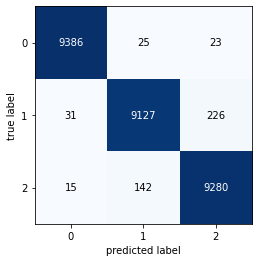

In [33]:
model = LogisticRegression(C=study.best_params['logreg_c'], solver='lbfgs', n_jobs=N_JOBS)

X_train_w2v, X_test_w2v = applyW2vMean(X_train, X_test)

model.fit(X_train_w2v, y_train)

y_pred = model.predict(X_test_w2v)

report_and_cm(y_test, y_pred)


Vemos então um modelo que performou excepcionalmente bem, tanto nos dados de validação do KFold, quanto nos dados de teste. Isso pode significar que, conforme observamos anteriormente, o modelo conseguiu determinar que os tweets com a query ":)" eram positivos, enquanto que os tweets com a query ":(" eram negativos

In [35]:
# Salvando o modelo
pickle.dump(model, open('datasets/finalModel.pkl', 'wb'))
pickle.dump(y_pred, open('datasets/final.pkl', 'wb'))
pickle.dump(y_pred, open('datasets/finalPreds.pkl', 'wb'))

### Análise de Viés

Vamos observar, no modelo final, se houve uma grande correlação entre as queries e as previsões do modelo

In [40]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42


In [46]:
df = pd.read_pickle('./datasets/fixed_training_data.pkl')
X = df.drop('sentiment',axis=1)
y = df['sentiment']
y_pred = pickle.load(open('datasets/finalPreds.pkl', 'rb'))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)


In [47]:
X_test['sentiment'] = y_test
X_test['prediction'] = y_pred

In [78]:
# Relembrando que cada query_used tem um sentimento associado

X_test.groupby('query_used')['sentiment'].value_counts(
    normalize=True).unstack().fillna(0).apply(lambda x: x*100).style.format('{:.2f}%')

sentiment,0,1,2
query_used,,,
#curiosidade,0.00%,0.00%,100.00%
#fato,0.00%,0.00%,100.00%
#noticia,0.00%,0.00%,100.00%
#novidade,0.00%,0.00%,100.00%
#oportunidade,0.00%,0.00%,100.00%
#trabalho,0.00%,0.00%,100.00%
:(,100.00%,0.00%,0.00%
:),0.00%,100.00%,0.00%
estadao,0.00%,0.00%,100.00%


In [75]:
# Verificando como o modelo se comportou em cada query_used

df_results = X_test.groupby('query_used')['prediction'].value_counts(
    normalize=True).unstack().fillna(0).apply(lambda x: x*100)

df_results.style.format('{:.2f}%')

prediction,0.0,1.0,2.0
query_used,,,
#curiosidade,1.89%,3.77%,94.34%
#fato,0.00%,3.91%,96.09%
#noticia,0.30%,0.00%,99.70%
#novidade,0.00%,2.26%,97.74%
#oportunidade,0.14%,3.56%,96.30%
#trabalho,0.00%,0.58%,99.42%
:(,99.49%,0.26%,0.24%
:),0.33%,97.26%,2.41%
estadao,0.00%,2.74%,97.26%


Vemos que o modelo foi capaz de identificar, com precisão, mais de 94% das classificações de cada query. Se aproximando de 99% na maioria dos query_used

# Conclusões

Concluímos que, dado que a classificação inicial dos tweets foi feita com base nas queries, e na localização dos respectivos emoticons `:)` e `:(` para avaliar se um tweet era positivo ou negativo, o modelo teve uma acertividade muito alta quando não removemos os caracteres especiais como forma do tratamento inicial. Remover as palavras unicas teve pouco efeito, pois o Word2Vec ja faz esse processo, então fazê-lo durante o pré-processamento não apresentou ganhos incríveis. Infelizmente não tive o tempo que gostaria para testar outros modelos de MachineLearning com o Word2Vec. Após essa conclusão, não tenho mais tanta certeza de que a Regressão Logística era a melhor solução para o problema, mas pelo fato dos meus recursos computacionais serem limitados, não consegui rodar o Word2Vec com todos os outros modelos de Machine Learning (Regressão Logística era extremamente mais rápido que qualquer outro modelo que testei).

Acredito que exista um viés muito grande no modelo, em que, caso não haja um dos dois emoticons descritos anteriormente na mensagem, ele vai classificar ela como sendo neutro, sendo que, nem sempre expressamos nossa felicidade através de `:)` e nem sempre expressamos nossa tristeza através de `:(`

### Trabalhos futuros

#### Thresholds tunados
Como o problema envolve apenas 3 classes, existe a possibilidade de tunar o threshold de maneira simples. Por questões de tempo, não tive a oportunidade de testar, mas a minha teoria é de que seria possível tunar os thresholds a partir da seguinte lógica:
    1. Escolher uma classe prioritária;
    2. Definir o threshold dela;
    3. Caso não seja classificado como a primeira classe, definir um threshold para que sejam classificadas as outras classes;

Existe a necessidade de escolher uma classe primária pois, caso contrário, duas condições de verdade poderiam ser atingidas ao mesmo tempo, e aí teriamos de utilizar a classe primária como critério de desempate.

Uma outra opção seria definir thresholds de classificação para cada classe, e, para desempates, utilizar a distância entre o valor da classe e o threshold definido. Por exemplo, se os thresholds são [0.2, 0.6, 0.2] e o y_proba é [0.25 0.49 0.26], escolheríamos a classe 2, pois sua distância (0.26 - 0.2) seria maior do que da classe 0 (0.25 - 0.2) 

#### Testar Outros Modelos

Testar outros modelos de machine learning (XGBoost, LightGBM), utilizando o ppNumber = 1 e Word2Vec-Mean pode ser uma solução para melhorar ainda mais o resultado do modelo.

#### Testar Outros Word2Vecs

Apesar do Word2Vec-Mean ter apresentado um resultado incrível, talvez fosse possível que o Word2Vec-Sum ou Word2Vec-Normalized-Sum pudessem apresentar resultados ainda melhores.

#### Testar um modelo que generalize melhor

Vemos que o resultados esplêndido dos modelos W2V se deu por conta da maneira como a analise de sentimento dos dados de treino foi construída. Olhando apenas os modelos em que removemos os caracteres especiais do pré-processamento, temos o seguinte modelo como o melhor:

    - Pré-processamento: 4
    - Modelo de pré-procesasmento: CountVectorize
    - ML Model: Logistic Regression
    - F1 Score: 0.814523

Por não se utilizar dos emoticons `:)` e `:(`, esse modelo poderia ser melhor em avaliar corretamento os sentimentos de tweets que não foram encontrados a partir das queries utilizadas para o modelo de treino e de submissão

# Processando dados de Submissão

In [98]:
import pandas as pd
import numpy as np
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy


from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression

import pickle


In [99]:
def preprocessing(rows):
    '''
        [pp1]
        - Remover acentuação
        - Tokenizar
        - Remover stopwords
        - Lemmatizar (spacy)
    '''
    my_stopwords = stopwords.words('portuguese')
    nlp = spacy.load('pt_core_news_lg')

    def pp_string(string):
        string = string.lower() # Lowercase
        string = unidecode(string) # Remove acentuação
        words = word_tokenize(string) # Tokenização
        filtered_words = [w for w in words if w not in my_stopwords] # Remove stopwords
        lemma_words = [t.lemma_ for t in nlp(' '.join(filtered_words))]  # lemma com spacy
        return lemma_words

    return rows.apply(lambda x: ' '.join(pp_string(x)))


def applyW2vMean(X_train, X_test):
    '''
        Given train and test strings, 
        apply Word2Vec and return train and test features
    '''
    def w2vMean(X, model):
        X_w2v = []
        for phrase in X:
            vecs = []
            for word in phrase:
                if word in model.wv.index_to_key:
                    vecs.append(model.wv.get_vector(word))
            if vecs:
                X_w2v.append(np.sum(vecs, axis=0) / len(vecs))

            else:
                X_w2v.append(np.zeros(model.vector_size))

        return X_w2v

    model = Word2Vec(
        sentences=X_train, vector_size=500, min_count=5, workers=6
    )

    X_train_w2v = np.array(w2vMean(X_train, model))
    X_test_w2v = np.array(w2vMean(X_test, model))

    return X_train_w2v, X_test_w2v


In [100]:
df_train = pd.read_csv('./datasets/Train3Classes.csv')
df_subm = pd.read_csv('./datasets/Subm3Classes.csv')

In [101]:
X_train = preprocessing(df_train['tweet_text'])
y_train = df_train['sentiment']

In [102]:
X_test = preprocessing(df_subm['tweet_text'])

In [103]:
# ppModel
X_train_w2v, X_test_w2v = applyW2vMean(X_train, X_test)

In [104]:
#Fit
study = pickle.load(open('./datasets/optunaStudy.pkl', 'rb'))

model = LogisticRegression(
    C=study.best_params['logreg_c'], solver='lbfgs', n_jobs=N_JOBS)


model.fit(X_train_w2v, y_train)

LogisticRegression(C=19.890171349811293, n_jobs=6)

In [105]:
#Predict
y_pred = model.predict(X_test_w2v)

In [108]:
#Export predictions
pickle.dump(y_pred, open('datasets/submPreds.pkl', 'wb'))
pd.DataFrame(y_pred, columns=['pred'])['pred'].to_csv(
    './datasets/submPreds.csv', index=False, header=False)


# Curiosidade

Para fins de curiosidade, vou checar os query_used das subm e minhas previsões.

In [111]:
df_train.groupby('query_used')['sentiment'].value_counts(
    normalize=True).unstack().fillna(0).apply(lambda x: x*100).style.format('{:.2f}%')

sentiment,0,1,2
query_used,,,
#curiosidade,0.00%,0.00%,100.00%
#fato,0.00%,0.00%,100.00%
#noticia,0.00%,0.00%,100.00%
#novidade,0.00%,0.00%,100.00%
#oportunidade,0.00%,0.00%,100.00%
#trabalho,0.00%,0.00%,100.00%
:(,100.00%,0.00%,0.00%
:),0.00%,100.00%,0.00%
estadao,0.00%,0.00%,100.00%


In [112]:
df_subm['sentiment'] = y_pred
df_subm.groupby('query_used')['sentiment'].value_counts(
    normalize=True).unstack().fillna(0).apply(lambda x: x*100).style.format('{:.2f}%')


sentiment,0,1,2
query_used,,,
#curiosidade,0.00%,5.26%,94.74%
#fato,0.00%,2.20%,97.80%
#noticia,1.67%,0.00%,98.33%
#novidade,0.00%,2.22%,97.78%
#oportunidade,0.00%,2.82%,97.18%
#trabalho,1.10%,1.66%,97.24%
:(,99.57%,0.18%,0.24%
:),0.48%,97.04%,2.48%
estadao,0.00%,2.88%,97.12%


In [150]:
subm_results = df_subm.groupby('query_used')[
    'sentiment'].value_counts().unstack().fillna(0).reset_index()


In [180]:
sentiment_results = pd.DataFrame(
    columns=['correto','incorreto'])


In [183]:
# Classe 0
classe_0 = {
    'correto': 0,
    'incorreto': 0
}

classe_1 = {
    'correto': 0,
    'incorreto': 0
}

classe_2 = {
    'correto': 0,
    'incorreto': 0
}


for index, row in subm_results.iterrows():
    if row['query_used'] == ':(':
        classe_0['correto'] += row[0]
        classe_1['incorreto'] += row[1]
        classe_2['incorreto'] += row[2]

    elif row['query_used'] == ':)':
        classe_0['incorreto'] += row[0]
        classe_1['correto'] += row[1]
        classe_2['incorreto'] += row[2]

    else:
        classe_0['incorreto'] += row[0]
        classe_1['incorreto'] += row[1]
        classe_2['correto'] += row[2]


sentiment_results = sentiment_results.append(classe_0, ignore_index=True)
sentiment_results = sentiment_results.append(classe_1, ignore_index=True)
sentiment_results = sentiment_results.append(classe_2, ignore_index=True)


In [184]:
sentiment_results


,correto,incorreto
0,1630.0,13.0
1,1607.0,28.0
2,1677.0,45.0


Imagino que os numeros acima serão os resultados do meu modelo na submissão